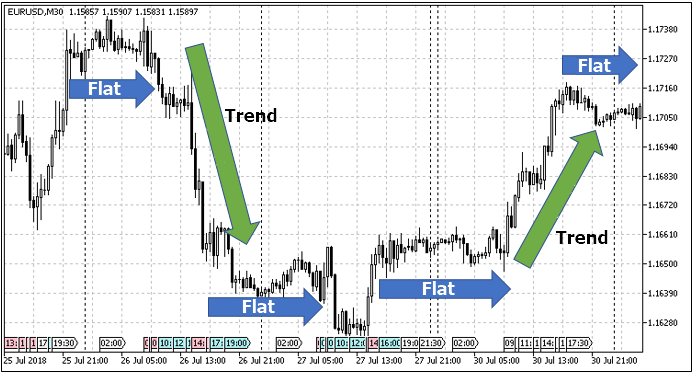

# Algoritmik Ticaret Stratejisi Nedir?
### Python ile bir Algoritmik ticaret stratejisi geliştirmek, tıpkı makine öğrenimi modelleri oluşturduğunuzda olduğu gibi, birkaç aşamadan geçen bir şeydir: Bir strateji formüle eder ve bilgisayarınızda test edebileceğiniz bir biçimde belirtirsiniz. bazı ön testler veya geri testler, stratejinizi optimize edersiniz ve son olarak stratejinizin performansını ve sağlamlığını değerlendirirsiniz.

### Alım satım stratejileri genellikle geriye dönük testlerle doğrulanır: geliştirdiğiniz stratejiyle tanımlanan kuralları kullanarak geçmişte gerçekleşmiş olabilecek alım satımları geçmiş verilerle yeniden yapılandırırsınız.

### Bu şekilde, stratejinizin etkinliği hakkında bir fikir edinebilir ve stratejinizi gerçek pazarlara uygulamadan önce optimize etmek ve iyileştirmek için bir başlangıç ​​noktası olarak kullanabilirsiniz.

### Bu, büyük ölçüde, geçmişte iyi sonuç vermiş herhangi bir stratejinin gelecekte de iyi sonuç vereceğine dair temel teoriye veya inanca dayanır. gelecek.

### Ve geçmişte kötü performans gösteren herhangi bir strateji muhtemelen gelecekte de kötü sonuç verecektir.

# Python ve Makine Öğrenimi ile Algoritmik Bir Ticaret Stratejisi Oluşturalım

### Bu program, hisse senetlerinin ne zaman alınıp satılacağını belirlemek için ikili hareketli ortalama geçişini kullanır.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
data = pd.read_csv("AAPL.csv")

In [3]:
data.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [4]:
data.isnull().sum()

Date               0
Open Price         0
High Price         0
Low Price          0
Close Price        0
Adj Close Price    0
Volume             0
dtype: int64

In [5]:
data.describe()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,157.978552,159.539694,156.544346,158.115756,152.312201,3.838967e+07
std,56.184602,57.034062,55.603048,56.412547,58.609623,1.950338e+07
min,87.982857,89.408569,87.947144,89.144287,80.739334,1.136200e+07
25%,111.967497,112.857502,110.614999,112.017502,104.381134,2.515898e+07
50%,145.315002,146.720001,144.325005,145.780006,139.728653,3.339445e+07
75%,189.650001,191.377503,187.724998,190.017494,185.526695,4.646998e+07
max,324.739990,327.850006,323.350006,327.200012,326.316681,1.898463e+08


In [6]:
data.shape

(1510, 7)

### Verileri Görselleştirelim

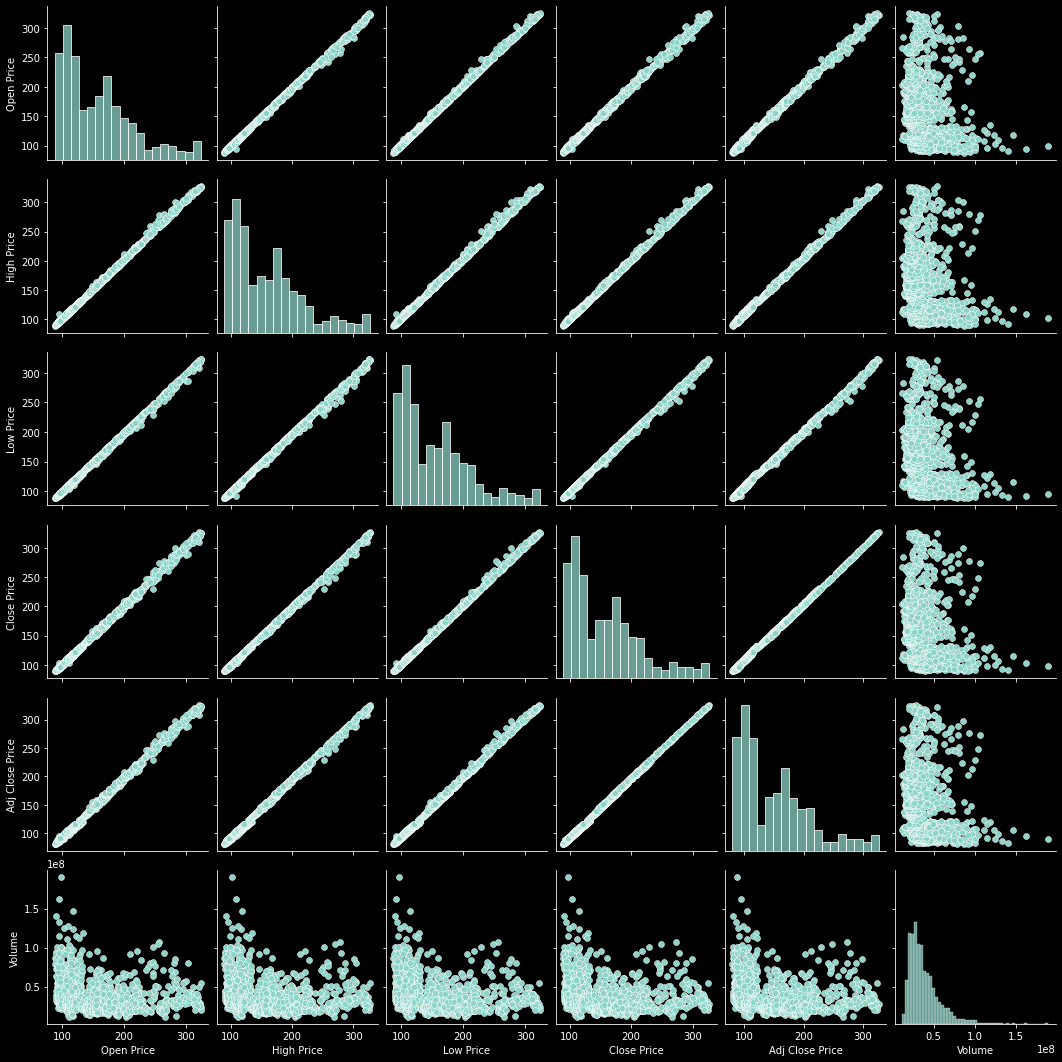

In [7]:
import seaborn as sns
sns.pairplot(data)

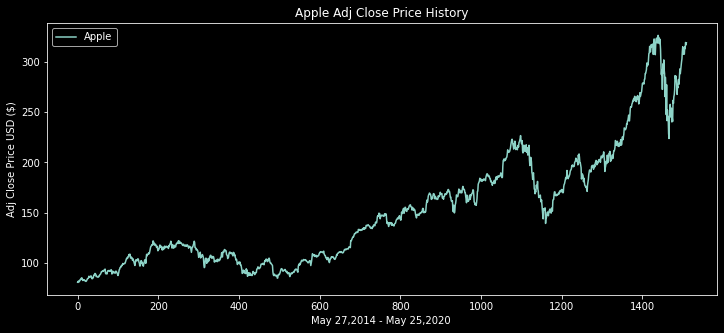

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close Price'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2014 - May 25,2020 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

#### 30 günlük bir pencereyle Basit bir hareketli ortalama oluşturun

In [9]:
sma30=pd.DataFrame()

In [10]:
sma30["Adj Close Price"]=data["Adj Close Price"].rolling(window=30).mean()

In [11]:
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,287.864806
1506,289.577426
1507,291.594106
1508,293.310716


#### Basit bir hareketli ortalama 100 günlük pencere oluşturmak için

In [12]:
sma100=pd.DataFrame()

In [13]:
sma100["Adj Close Price"]= data["Adj Close Price"].rolling(window=100).mean()

In [14]:
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,289.734840
1506,290.037927
1507,290.345799
1508,290.630966


#### Şimdi yeni verileri görselleştirelim

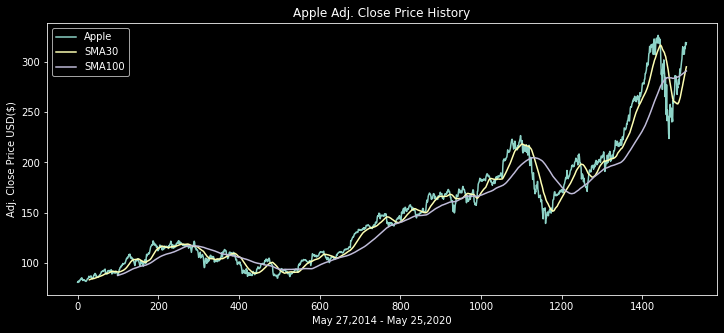

In [15]:
plt.figure(figsize=(12,5))
plt.plot(data['Adj Close Price'], label='Apple')
plt.plot(sma30['Adj Close Price'], label='SMA30')
plt.plot(sma100['Adj Close Price'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 27,2014 - May 25,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

#### Şimdi tüm verileri depolamak için yeni bir Veri Çerçevesi oluşturun

In [16]:
data2=pd.DataFrame()

In [17]:
data2["apple"]=data["Adj Close Price"]

In [18]:
data2["SMA30"]=sma30["Adj Close Price"]

In [19]:
data2["SMA100"]=sma100["Adj Close Price"]

In [20]:
data2

,apple,SMA30,SMA100
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


### Hisse senedinin ne zaman alınacağını veya satılacağını bildirmek için bir işlev oluşturun

In [21]:
def buySell(data2):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data2)):
        if data2 ['SMA30'][i] > data2['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data2['apple'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data2['SMA30'][i] < data2['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data2['apple'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy, sigPriceSell)

#### Alış ve satış verilerini bir değişkende depolamak için

In [22]:
buySell=buySell(data2)

In [23]:
data2['Buy Signal Price'] = buySell[0]
data2['Sell Signal Price'] = buySell[1]

In [24]:
data2

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


#### Şimdi hisse senedi alıp satmak için verileri ve stratejiyi görselleştirelim

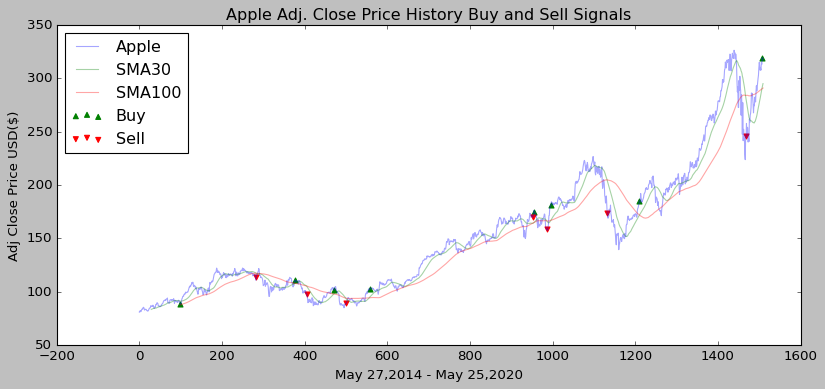

In [25]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data2['apple'], label='Apple', alpha=0.35)
plt.plot(data2['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data2['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data2.index, data2['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data2.index, data2['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 27,2014 - May 25,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()